In [1]:
capture log close

In [2]:
capture log using "..\log\empirical_exercise7"

In [3]:
/****************************************************************************
* File name: empirical_exercise7.do
* Author(s): Sze, J.
* Date: 3/30/2019
* Description: 
* Answers to empirical exercise 6 for Labor Economics
*
* Inputs: 
* "..\input_data\BirthQuarter, 1930s Cohorts.dta"
* 
* Outputs:
* 
***************************************************************************/

In [4]:
cd

C:\Users\jerem\Documents\Labor Economics\dofiles


### Empirical Exercise 7

This week’s exercise uses Angrist and Krueger’s (1991) data from the the 1980 Census of Population
to estimate a “rate of return” to schooling that’s free of ability bias. The data set, “Birth
Quarter, 1930s Cohorts.dta,” contains 329,509 observations on white men born in the
1930s.

In [5]:
use "..\input_data\Birth Quarter, 1930s Cohorts.dta",clear

### A. Wald Estimate: Replicating Table 3, Panel B. 
1. create a variable that indicates the worker was born in the first quarter of the year.<br>
2. regress the log of weekly earnings(log wage, for short) on the schooling variable educ. <br>
3. use tabstat to compute the means of log wage and schooling by the first-quarter dummy; the results are two points on a schooling–log-wage graph.
    - What is the slope of a line through the two points? <br>
4. produce two-stage least squares estimates of the effect of educ on lwklywge using the first-quarter dummy to instrument educ; include the first option. 
    - Does being born in the first quarter increase or decrease schooling?<br>
5. compare the 2sls estimate with (a) the ols estimate and (b) the slope of the line through the two points.

In [6]:
describe


Contains data from ..\input_data\Birth Quarter, 1930s Cohorts.dta
  obs:       329,509                          
 vars:            13                          18 Mar 2019 16:52
 size:     7,249,198                          
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
age             byte    %8.0g                 
ageq            float   %9.0g                 
educ            byte    %8.0g                 
lwklywge        floa

In [7]:
sum


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         age |    329,509    44.64508    2.939745         40         50
        ageq |    329,509    45.02062      2.9207      40.25         50
        educ |    329,509    12.76991    3.281244          0         20
    lwklywge |    329,509    5.899944    .6788238  -2.341806    10.5321
     married |    329,509    .8625591    .3443127          0          1
-------------+---------------------------------------------------------
      census |    329,509          80           0         80         80
         qob |    329,509    2.506429    1.111922          1          4
        race |    329,509    .0816761     .273871          0          1
        smsa |    329,509    .1863318    .3893748          0          1
         yob |    329,509    34.60277    2.904956         30         39
-------------+-------------------------------------------------

In [8]:
tab yob qob


           |                     qob
       yob |         1          2          3          4 |     Total
-----------+--------------------------------------------+----------
        30 |     8,395      8,396      8,722      8,089 |    33,602 
        31 |     7,642      7,634      7,980      7,327 |    30,583 
        32 |     8,252      7,751      8,311      7,897 |    32,211 
        33 |     7,818      7,572      7,718      7,643 |    30,751 
        34 |     7,782      7,591      8,474      8,069 |    31,916 
        35 |     7,995      8,002      8,792      7,984 |    32,773 
        36 |     8,192      7,945      8,579      7,960 |    32,676 
        37 |     8,187      8,182      9,226      8,374 |    33,969 
        38 |     8,708      8,482      9,371      8,662 |    35,223 
        39 |     8,700      8,583      9,683      8,839 |    35,805 
-----------+--------------------------------------------+----------
     Total |    81,671     80,138     86,856     80,844 |   329,509 

In [9]:
gen firstquarter = (qob == 1)
tab firstquarter




firstquarte |
          r |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |    247,838       75.21       75.21
          1 |     81,671       24.79      100.00
------------+-----------------------------------
      Total |    329,509      100.00


In [10]:
regress lwklywge educ 


      Source |       SS           df       MS      Number of obs   =   329,509
-------------+----------------------------------   F(1, 329507)    =  43782.56
       Model |  17808.8293         1  17808.8293   Prob > F        =    0.0000
    Residual |  134029.041   329,507   .40675628   R-squared       =    0.1173
-------------+----------------------------------   Adj R-squared   =    0.1173
       Total |  151837.871   329,508  .460801773   Root MSE        =    .63777

------------------------------------------------------------------------------
    lwklywge |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        educ |    .070851   .0003386   209.24   0.000     .0701874    .0715147
       _cons |   4.995182   .0044644  1118.88   0.000     4.986432    5.003932
------------------------------------------------------------------------------


A 1 unit increase in education leads to a 7.1% increase in wages.

In [11]:
tabstat lwklywge educ, by(firstquarter)


Summary statistics: mean
  by categories of: firstquarter 

firstquarter |  lwklywge      educ
-------------+--------------------
           0 |  5.902695  12.79688
           1 |  5.891596  12.68807
-------------+--------------------
       Total |  5.899944  12.76991
----------------------------------


In [12]:
di "slope = "(5.891596-5.902695) / (12.68807-12.79688)

slope = .10200349


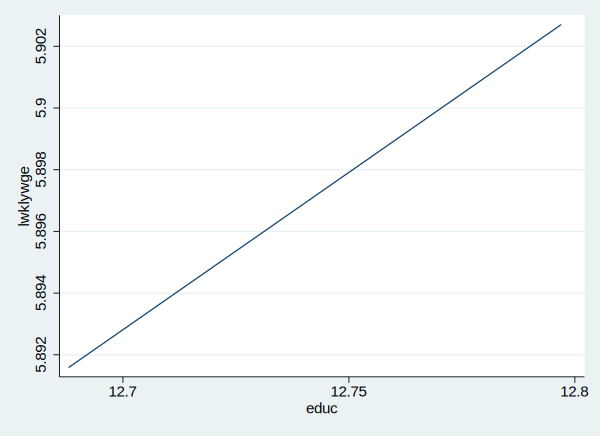

In [13]:
preserve 
clear
qui set obs 2
qui gen lwklywge = 5.891596 in 1
qui replace lwklywge = 5.902695 in 2
qui gen educ = 12.68807 in 1
qui replace educ = 12.79688 in 2
line lwklywge educ
restore

### Two stage least square estimate

In [14]:
ivregress 2sls lwklywge (educ = firstquarter), first


First-stage regressions
-----------------------

                                                Number of obs     =    329,509
                                                F(   1, 329507)   =      67.57
                                                Prob > F          =     0.0000
                                                R-squared         =     0.0002
                                                Adj R-squared     =     0.0002
                                                Root MSE          =     3.2809

------------------------------------------------------------------------------
        educ |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
firstquarter |  -.1088179   .0132376    -8.22   0.000    -.1347633   -.0828725
       _cons |   12.79688   .0065904  1941.75   0.000     12.78397     12.8098
------------------------------------------------------------------------------



The 2sls estimates that a unit increase in education leads to a 10.2% increase in wages. This is similar to the wald estimate that we found using the tabstat command of 10.2% increase in wages. The ols estimates that a unit increase in education leads to a 7.1% increase in wages. 

### B. Instrumental Variables: Replicating Table 5. 

1. generate 2sls estimates of the log-wage regression instrumenting educ with quarter-of-birth dummies (e.g., i.qob); include birthyear effects in the main regression. 
2. estimate the same regression by 2sls but interact birth quarter with birth year to generate the instruments (e.g., i.qob#i.yob).
3. add race, married, and smsa to the log-wage regression. 
4. follow up your final “ivregress 2sls ...” with “estat firststage” to check whether the 2sls estimate suffers from weak instruments.

In [15]:
ivregress 2sls lwklywge yob (educ = qob), first


First-stage regressions
-----------------------

                                                Number of obs     =    329,509
                                                F(   2, 329506)   =     511.61
                                                Prob > F          =     0.0000
                                                R-squared         =     0.0031
                                                Adj R-squared     =     0.0031
                                                Root MSE          =     3.2762

------------------------------------------------------------------------------
        educ |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         yob |   .0596687   .0019648    30.37   0.000     .0558178    .0635195
         qob |   .0501738   .0051331     9.77   0.000     .0401131    .0602345
       _cons |   10.57945   .0693153   152.63   0.000      10.4436    10.71531
-

In [16]:
ivregress 2sls lwklywge yob (educ = i.qob#i.yob), first 

note: 4.qob#39.yob dropped due to collinearity

First-stage regressions
-----------------------

                                                Number of obs     =    329,509
                                                F(  39, 329469)   =      27.90
                                                Prob > F          =     0.0000
                                                R-squared         =     0.0033
                                                Adj R-squared     =     0.0032
                                                Root MSE          =     3.2760

------------------------------------------------------------------------------
        educ |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         yob |   .0929027   .0055474    16.75   0.000       .08203    .1037753
             |
     qob#yob |
       1 31  |   .1671268     .04929     3.39   0.001     .0705199    .2637337
   

In [17]:
ivregress 2sls lwklywge yob i.race i.married i.smsa (educ = i.qob#i.yob), first 

note: 4.qob#39.yob dropped due to collinearity

First-stage regressions
-----------------------

                                                Number of obs     =    329,509
                                                F(  42, 329466)   =     341.56
                                                Prob > F          =     0.0000
                                                R-squared         =     0.0417
                                                Adj R-squared     =     0.0416
                                                Root MSE          =     3.2123

------------------------------------------------------------------------------
        educ |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         yob |   .0960479   .0054395    17.66   0.000     .0853865    .1067092
      1.race |  -1.708677   .0205702   -83.07   0.000    -1.748994   -1.668359
   1.married |   .1573298   .0163

In [18]:
estat firststage


  First-stage regression summary statistics
  --------------------------------------------------------------------------
               |            Adjusted      Partial
      Variable |   R-sq.       R-sq.        R-sq.   F(38,329466)  Prob > F
  -------------+------------------------------------------------------------
          educ |  0.0417      0.0416       0.0005       4.02268    0.0000
  --------------------------------------------------------------------------


  Minimum eigenvalue statistic = 4.02268     

  Critical Values                      # of endogenous regressors:    1
  Ho: Instruments are weak             # of excluded instruments:    38
  ---------------------------------------------------------------------
                                     |    5%     10%     20%     30%
  2SLS relative bias                 |         (not available)
  -----------------------------------+---------------------------------
                                     |   10%     15%    

The 2 stage least squares estimate suffers from weak instrument as only 4.2% of the variance of education is explained by the instrument interaction of quarter of birth and year of birth.

In [19]:
capture log close